# SVHN dataset image classification using optimised CNN


# 1. Imports

In [1]:
import numpy as np
import scipy.io as spio

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
#Function for converting rgb images from SVHN dataset to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])



In [3]:
def formatArray(data):
    im = []
    for i in range(0, data.shape[3]):
        im.append(rgb2gray(data[:, :, :, i]))
    return np.asarray(im)

In [4]:
#Function for updating labels (Replace 10 in labels with 0)

def fixLabel(labels):
    labels[labels == 10] = 0
    return labels

# Load training and test data

In [5]:

mat1 = spio.loadmat('train_32x32.mat', squeeze_me=True)     # extra data used
mat2 = spio.loadmat('test_32x32.mat', squeeze_me=True)
train_images=mat1['X']
train_labels=mat1['y']
test_images=mat2['X']
test_labels=mat2['y']



train_images.shape

(32, 32, 3, 73257)

In [6]:
test_images.shape

(32, 32, 3, 26032)

# Convert to proper format

In [7]:
train_images=formatArray(train_images)
test_images=formatArray(test_images)
train_labels=fixLabel(train_labels)
test_labels=fixLabel(test_labels)

In [8]:
train_images.shape

(73257, 32, 32)

In [9]:
test_images.shape

(26032, 32, 32)

In [10]:
#Specify class labels

class_names = ['0','1', '2', '3', '4', '5','6', '7', '8', '9']

In [15]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [16]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [17]:
# Reshape data from 2D to 3D so to pass it to CNN model
train_images = train_images.reshape(-1,32,32,1)
test_images = test_images.reshape(-1,32,32,1)

In [18]:
train_images.shape

(73257, 32, 32, 1)

In [19]:
test_images.shape

(26032, 32, 32, 1)

# Normalize the data

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [22]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [23]:
X_train.shape

(62268, 32, 32, 1)

In [24]:
y_train.shape

(62268, 10)

In [25]:
y_val.shape

(10989, 10)

# Create the training model

In [26]:
model=Sequential()

  
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(32,32,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    


# Compile the model

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Apply the model with 3 epochs

In [28]:
history=model.fit(X_train, y_train, batch_size=128,epochs=3,validation_data=(X_val, y_val))

Train on 62268 samples, validate on 10989 samples
Epoch 1/3
62268/62268 [==============================] - 279s 4ms/step - loss: 0.5374 - accuracy: 0.8338 - val_loss: 0.7590 - val_accuracy: 0.7519
Epoch 2/3
62268/62268 [==============================] - 264s 4ms/step - loss: 0.3019 - accuracy: 0.9102 - val_loss: 0.3739 - val_accuracy: 0.8875
Epoch 3/3
62268/62268 [==============================] - 254s 4ms/step - loss: 0.2380 - accuracy: 0.9288 - val_loss: 0.3705 - val_accuracy: 0.8861


In [29]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

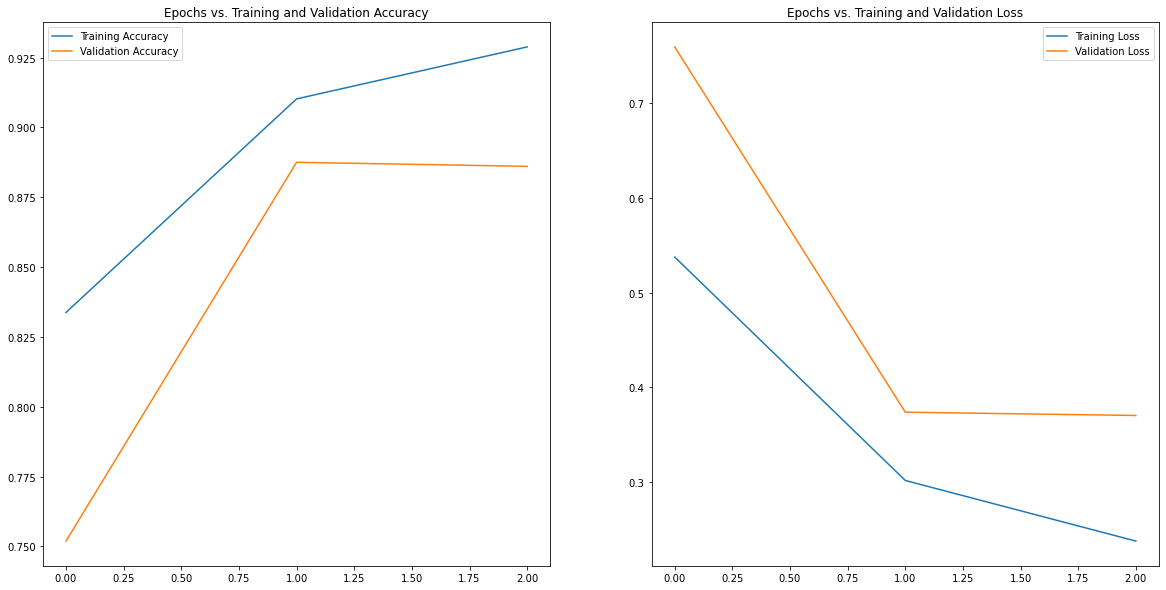

In [30]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()



# Model Summary

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)        

# Calculate the accuracy and loss on test data

In [33]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.8789 
Test loss is: 0.4009


# Confusion Matrix

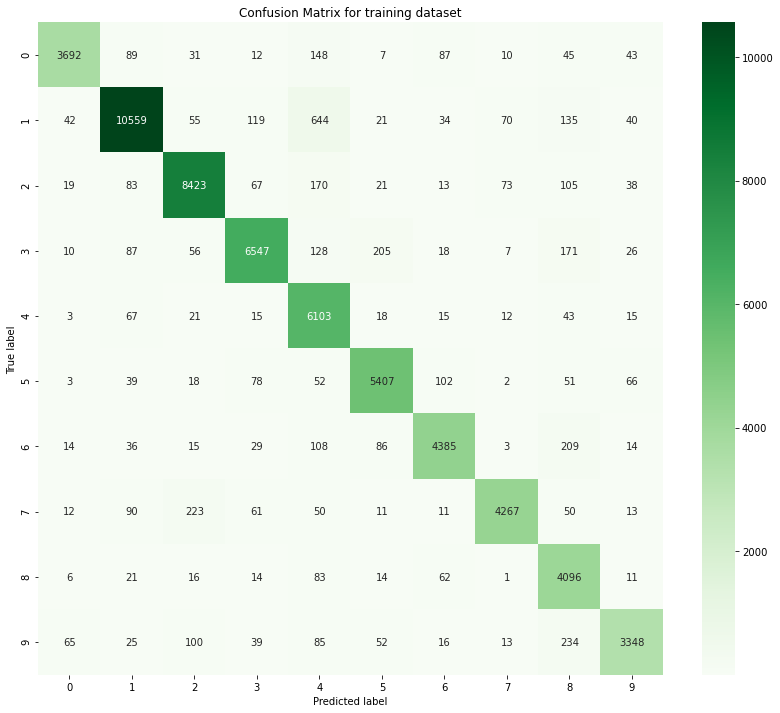

In [34]:
y_pred = model.predict(X_train)
y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)


# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
from sklearn import metrics

print("Precision Score : ",metrics.precision_score(y_train, y_pred, average='macro'))

print("Recall Score : ",metrics.recall_score(y_train, y_pred, average='micro'))

print("F1 Score : ",metrics.f1_score(y_train, y_pred, average='weighted'))



Precision Score :  0.9121461547353352
Recall Score :  0.9126196441189696
F1 Score :  0.9133045677165195


# Print the test accuracy

In [36]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8789182305335999
